### Constants or conversions you may need for this homework:  
$L_v = 2.5 \times 10^6 \, \text{J kg}^{-1}$  
$R_d = 287 \, \text{J kg}^{-1} \text{K}^{-1}$  
$R_v = 461 \, \text{J kg}^{-1} \text{K}^{-1}$  
$g = 9.81 \, \text{m s}^{-2}$  
$\rho_w = 1000 \, \text{kg m}^{-3}$  
$0^\circ\text{C} = 273.15 \, \text{K}$  





### **Problem 1: What is an adiabatic process? Why do air parcels cool when they are lifted in the atmosphere?**  
#### Explain using relevant law(s) of thermodynamics.  

An adiabatic process is a change in temperature of a control volume without exchange of heat with its environment. This can be explained by the ideal gas law, which states that changes in temperature are proportional with changes in pressure. As a control volume of air rises, it necessarily lowers in pressure and expands (less air above it exterting pressure) and the temperature of the control volume then also lowers.


### **Problem 2:** 
An air parcel near the surface has a temperature of 25ºC, a specific humidity of 12 g/kg, and surface pressure of 101,300 Pa.** Suppose that the temperature profile of the ambient air is given by:  

$$T(z) = T_{\text{surface}} - \Gamma_a \ast z$$

where the ambient lapse rate, $\Gamma_a = 7.5 \times 10^{-3} \, \text{K/m}$ and $T_{\text{surface}} = 25^\circ\text{C}$. The pressure profile for an environment with a linear temperature lapse rate can be derived from the hydrostatic equation and the ideal gas law and is equal to:  

$$p(z) = p_{\text{surface}} \left( \frac{T(z)}{T_{\text{surface}}} \right)^{\frac{g}{R_d \Gamma_a}}$$

a) Generate a plot of $q_s$ as a function of atmospheric height, $z$, from the surface to the approximate tropopause height (12km).  
b) If the air parcel is lifted adiabatically, at what height would you expect a cloud to form? In other words, what is the lifting condensation level, defined as the point where $q = q_s$?  

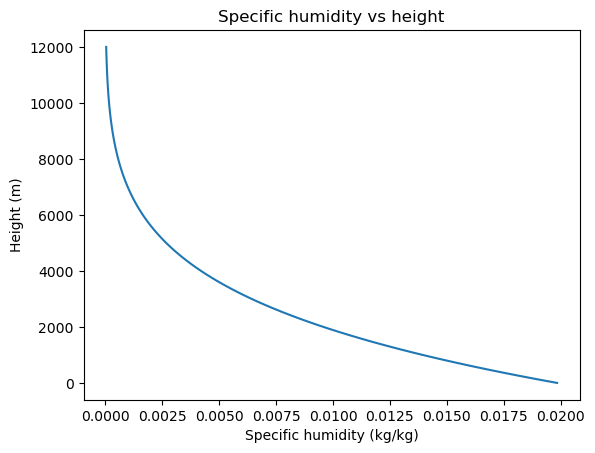

In [52]:
#Part a: Generate a plot of q_s vs z from the surface to 12 km
import numpy as np
import matplotlib.pyplot as plt

ambient_lapse_rate = 7.5 * 10**-3 #K/m ambient adiabatic lapse rate
dry_lapse_rate = 9.8 * 10**-3 #K/m dry adiabatic lapse rate
T_s = 273.15 + 25 #K surface temperature
P_s = 101300 #Pa surface pressure
q = 12/1000 # kg/kg specific humidity
R_d = 287 #J/kg/K gas constant for dry air
R_v = 461 #J/kg/K gas constant for water vapor
epsilon = R_d / R_v #ratio of gas constants
L_v = 2.5 * 10**6 #J/kg latent heat of vaporization
rho_water = 1000 #kg/m^3 density of water
g = 9.81 #m/s^2 acceleration due to gravity
c_p = 1005 #J/kg/K specific heat of dry air at constant pressure


z = np.linspace(0, 12000, 100) #height in meters

def calc_ambient_temp(z):
    return T_s - ambient_lapse_rate * z

def calc_ambient_pressure(z):
    return P_s * (calc_ambient_temp(z)/T_s)**(g / (ambient_lapse_rate * R_d))

def calc_e_sat(T):
    return 611 * np.exp((L_v / R_v) * (1 / 273.15 - 1 / T))

def q_s(z):
    return epsilon * calc_e_sat(calc_ambient_temp(z)) / calc_ambient_pressure(z)


plt.plot(q_s(z), z)
plt.xlabel('Specific humidity (kg/kg)')
plt.ylabel('Height (m)')
plt.title('Specific humidity vs height')
plt.show()

The height of the LCL/cloud base is 1406.36 m


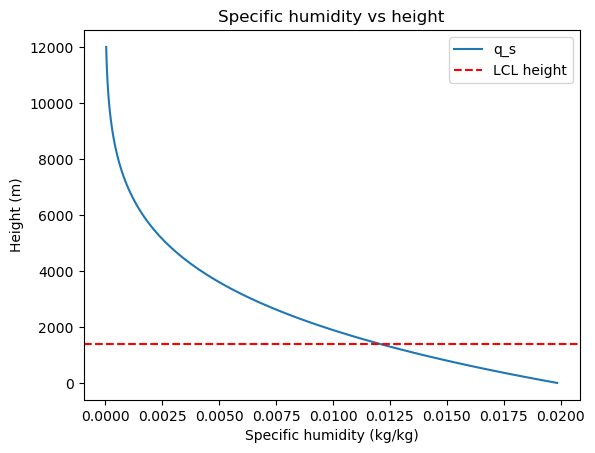

In [53]:
#Part b: At what height does LCL occur? (i.e. where does q_s = q?) 

import scipy.optimize as opt

LCL_height = opt.fsolve(lambda z: q_s(z) - q, 0)[0]

#format the height to 2 decimal places
print(f"The height of the LCL/cloud base is {LCL_height:.2f} m")

#Check answer by plotting q_s and q
plt.plot(q_s(z), z, label='q_s')
plt.axhline(y=LCL_height, color='r', linestyle='--', label='LCL height')
plt.xlabel('Specific humidity (kg/kg)')
plt.ylabel('Height (m)')
plt.title('Specific humidity vs height')
plt.legend()
plt.show()

### **c): Will parcel be negatively, positvely, or neutrally buoyant?**
#### The parcel will be neutrally buoyant compared to the environment. Because the pressure, tempeature, and specific humidity of the parcel are equal to the environment, the density will also be equal according to the ideal gas law. (If the densities are equal, the buoyancy is neutral).

### **d) What is the moist adiabatic lapse rate at the LCL?** 
Hint:  

$$\frac{d(e^{a-\frac{b}{x}})}{dx} = \frac{b \ast e^{a-\frac{b}{x}}}{x^2}$$

#### $$ \Gamma_s = \frac{\Gamma_d}{1 + \left( \frac{L_v}{c_p} \frac{dqs}{dT} \right)} $$

#### $$ T_{LCL} = T_{surface} - \Gamma_a \cdot z $$

#### $$ P_{LCL} = P_{surface} \left( \frac{T_{LCL}}{T_{surface}} \right)^{\frac{g}{R_d \Gamma_a}} $$

#### $$ q_s(z) = \frac{\varepsilon \cdot 611 \cdot \exp\left(\frac{L_v}{R_v} \left(\frac{1}{273.15} - \frac{1}{T_s - \Gamma_d \cdot z}\right)\right)}{P_s \cdot \left(\frac{T_s - \Gamma_a \cdot z}{T_s}\right)^{\frac{g}{\Gamma_a \cdot R_d}}} $$

#### $$ q_s(z_{LCL}) = \frac{\varepsilon \cdot 611 \cdot \exp\left(\frac{L_v}{R_v} \left(\frac{1}{273.15} - \frac{1}{T_{LCL}}\right)\right)}{P_{LCL}} $$


#### $$ \frac{dq_s}{dT} = \frac{\varepsilon}{P_{LCL}} \cdot \left(\frac{L_v}{R_v}\right) \cdot 611 \cdot \exp\left(\frac{L_v}{R_v} \cdot \left(\frac{1}{T_o} - \frac{1}{T_{LCL}}\right)\right) \cdot \frac{1}{{(T_{LCL})}^2} $$






In [54]:
def calc_dqs_dz(z):
    return epsilon / calc_ambient_pressure(z) * (L_v / R_v) * 611 * np.exp((L_v / R_v) * (1 / 273.15 - 1 / calc_ambient_temp(z))) / (calc_ambient_temp(z)**2)

P_LCL = calc_ambient_pressure(LCL_height)
T_LCL = calc_ambient_temp(LCL_height)
dqs_dz = calc_dqs_dz(LCL_height)
LCL_lapse_rate = dry_lapse_rate / (1 + ((L_v / c_p) *dqs_dz))
print(f"The pressure at the LCL is {P_LCL:.1f} Pa")
print(f"The temperature at the LCL is {T_LCL:.2f} K")
print(f"dqs_dz at the LCL is {dqs_dz:.2e} kg/kg/m")
print(f"The moist adiabatic lapse rate at the LCL is {LCL_lapse_rate:.2e} K/m")

The pressure at the LCL is 85964.5 Pa
The temperature at the LCL is 287.60 K
dqs_dz at the LCL is 7.87e-04 kg/kg/m
The moist adiabatic lapse rate at the LCL is 3.31e-03 K/m


### e) **Generate a plot showing the temperature of the environment and the temperature of the parcel as a function of atmospheric height, $z$, from the surface to the approximate tropopause height (12km).** 

Assume the parcel is lifted adiabatically.  

### f) **Approximately what heights correspond to the level of free convection and the level of neutral buoyancy?**  


The level of free convection is at 2181.8 m
The level of neutral buoyancy is at 11,515.2 m


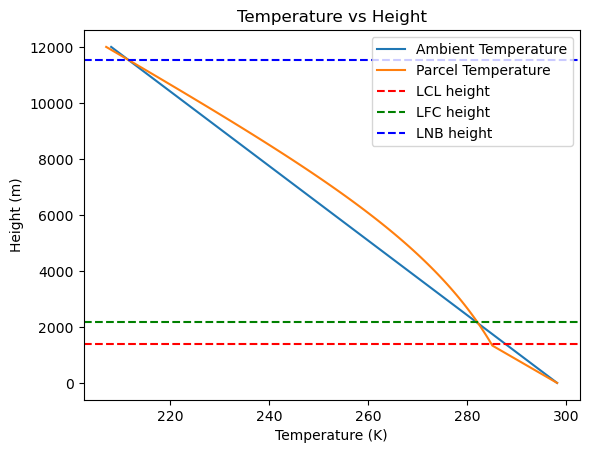

In [64]:
z = np.linspace(0, 12000, 100) #height in meters
T = calc_ambient_temp(z)
dqs_dz = calc_dqs_dz(z)
parcel_lapse_rate= np.where(z < LCL_height, 
                            dry_lapse_rate, 
                            dry_lapse_rate / (1 + ((L_v / c_p) * dqs_dz)))
# Assuming T_s and dz are defined earlier in your code
T_parcel = np.zeros(len(z))
T_parcel[0] = T_s

dz = np.diff(z)[0]

# Compute temperature changes due to lapse rate and apply cumulatively
temperature_changes = np.cumsum(parcel_lapse_rate[1:] * dz)
T_parcel[1:] = T_s - temperature_changes

#Find heights at which the parcel temperature equals the ambient temperature
LFC = z[np.where(T_parcel > T)[0][0]]
LNB = z[np.where(T_parcel > T)[0][-1]]

print(f"The level of free convection is at {LFC:.1f} m")
#format LNB value with commas in thousands separator
print(f"The level of neutral buoyancy is at {LNB:,.1f} m")

# Adjust the plot to include all temperatures
plt.plot(T, z, label='Ambient Temperature')
plt.plot(T_parcel, z, label='Parcel Temperature')
# Add a horizontal line at the LCL
plt.axhline(y=LCL_height, color='r', linestyle='--', label='LCL height')
plt.axhline(y=LFC, color='g', linestyle='--', label='LFC height')
plt.axhline(y=LNB, color='b', linestyle='--', label='LNB height')
plt.xlabel('Temperature (K)')
plt.ylabel('Height (m)')
plt.title('Temperature vs Height')
plt.legend()
plt.show()


### **Problem 3: Meteorology of Precipitation**  
a. **What are the four main mechanisms of vertical uplift in the atmosphere that lead to cloud formation and precipitation?** Provide a short description of each mechanism.  
b. **Choose a location that interests you and read about the precipitation in that location. What are the main mechanisms leading to precipitation in that location? Is there a strong seasonal cycle in precipitation in that location? Why?**  

### **Problem 4:**

Suppose a cloud has a Marshall-Palmer drop size distribution with an average drop diameter of 1 mm and $N_0 = 8000 \, \text{m}^{-3} \, \text{mm}^{-1}$.

**a. What is the total number of drops in the cloud (per cubic meter of air)?**  

$$
c = \frac{1}{\overline{D}} = \frac{1}{1 \, \text{mm}} = 1 \, \text{mm}^{-1}
$$


$$
\int_{0}^{\infty} N_{o} \cdot \exp(-cD) \, dD
$$

$$
= -\frac{N_{0}}{c} \left. e^{-cD} \right|_{0}^{\infty}
$$

$$
= -\frac{N_{0}}{c} [0 - (-1)] = \frac{N_{0}}{c}
$$

$$
= \frac{8000 \, \text{m}^{-3} \, \text{mm}^{-1}}{1 \, \text{mm}^{-1}} = 8000 \, \text{drops} / \text{m}^{3}
$$


**b. What is the liquid water content of the cloud (in grams per cubic meter of air)?**  
Show all steps in your calculation. Hint: a helpful integral is $\int_0^\infty x^n e^{-\alpha x} dx = \frac{n!}{\alpha^{n+1}}$

$$ c = 1 \, \text{mm}^{-1} $$ 
$$\rho_w = 1000 \, \text{kg m}^{-3}$$  
$$N_0 = 8000 \, \text{m}^{-3} \, \text{mm}^{-1}$$

$$
\text{LWC} = \rho_w \pi \int_{0}^{\infty} \frac{D^3}{6} N_{0} e^{-cD} \, dD = \rho_w \pi N_{0} \int_{0}^{\infty} \frac{D^3}{6} e^{-cD} \, dD = \rho_w \pi N_{0} \frac{3!}{c^4} 
$$


$$
\begin{align*}
&= \rho_w \pi N_{0} \frac{1}{c^4} \\
&= 1000 \, \text{kg m}^{-3} \cdot \pi \cdot 8000 \, \text{m}^{-3} \, \text{mm}^{-1} \cdot \frac{1}{(1 \, \text{mm}^{-1})^4} \\
&= 1000 \, \text{kg m}^{-3} \cdot \pi \cdot 8000 \, \text{m}^{-3} \, \text{mm}^{-1} \cdot \frac{1}{1^4 \, \text{mm}^{-4}} \\
&= 1000 \cdot 8000 \cdot \pi \, \text{kg m}^{-3} \, \text{m}^{-3} \, \text{mm}^{-1} \cdot \text{mm}^{4} \\
&= 8 \times 10^6 \cdot \pi \, \text{kg} \, \text{m}^{-6} \, \text{mm}^{3} \\
&= 8 \times 10^6 \cdot \pi \, \text{kg} \, \text{m}^{-6} \, \left(\frac{1}{1000}\right)^3 \, \text{m}^{3} \\
&= 8 \times 10^6 \cdot \pi \cdot 10^{-9} \, \text{kg} \, \text{m}^{-3} \\
\end{align*}
$$

$$ LWC = 25.1 \, \text{g} \, \text{m}^{-3}$$

**c. Assume that the terminal velocity of droplets in the cloud follows a linear form with multiplicative factor $\alpha = 1500 \, \text{s}^{-1}$ and that the cloud has an updraft velocity of $3 \, \text{m s}^{-1}$. What is the minimum drop size that will precipitate out of the cloud?**  

$$
\begin{align*}
V_t(D_{\text{up}}) - V_{\text{up}} &= \alpha D_{\text{up}} - V_{\text{up}} = 0 \\
\Rightarrow D_{\text{up}} &= \frac{V_{\text{up}}}{\alpha} = \frac{3 \, \text{m s}^{-1}}{1500 \, \text{s}^{-1}} = 2 \, \text{mm}
\end{align*}
$$


**d. Calculate the precipitation rate at the surface $\frac{\text{mm}}{\text{hr}}$.** You can assume that evaporation in the sub-cloud layer is negligible. Note that since the limits of the integral have changed, you can no longer use the hint from part b) and you may want to integrate numerically to get your answer.

$$
P_b = \int_{D_{\text{up}}}^{\infty} \pi \frac{D^3}{6} N_0 e^{-cD}[\alpha D - V_{\text{up}}] \, dD
$$

$$
P_b = \int_{2 \, \text{mm}}^{\infty} \pi \frac{D^3}{6} \cdot 8000 \, \text{m}^{-3} \, \text{mm}^{-1} \cdot e^{-D} \left[1500 \, \text{s}^{-1} \cdot D - 3000 \, \text{mm s}^{-1}\right] \, dD
$$

$$ c = 1 \, \text{mm}^{-1} $$ 
$$N_0 = 8000 \, \text{m}^{-3} \, \text{mm}^{-1}$$
$$\alpha = 1500 \, \text{s}^{-1}$$
$$ D_{\text{up}} = 2 \, \text{mm} $$
$$ V_{\text{up}} = 3 \, \text{m s}^{-1} $$

In [81]:
from scipy.integrate import quad
import numpy as np

N_0 = 8000 *1000 # m^-4
c = 1 * 1000 # m^-1
alpha = 1500  # s^-1
D_up = 2  / 1000 # m 
V_up = 3 # m/s


# Define the integrand
def integrand(D):
    return np.pi * (D**3 / 6) * N_0 * np.exp(-c * D) * (alpha * D - V_up)

# Perform numerical integration from D_up to infinity
result, error = quad(integrand, D_up, np.inf)

#convert result from m/s to mm / hr
sec_to_hr = 3600
m_to_mm = 1000
result = result * sec_to_hr * m_to_mm

print(f"The result of the integration is {result:.2f} mm/hr")

#convert mm to inches
mm_to_in = 0.0393701
result *= mm_to_in
print(f"The result of the integration is {result:.2f} in/hr")

The result of the integration is 281.63 mm/hr
The result of the integration is 11.09 in/hr


In [84]:
from scipy.integrate import quad
import numpy as np

N_0 = 8000 / 1000**3  # mm^-4
c = 1 # mm^-1
alpha = 1500  # s^-1
D_up = 2  # mm
V_up = 3 * 1000 # mm/s


# Define the integrand
def integrand(D):
    return np.pi * (D**3 / 6) * N_0 * np.exp(-c * D) * (alpha * D - V_up)

# Perform numerical integration from D_up to infinity
result, error = quad(integrand, D_up, np.inf)

#convert result from m/s to mm / hr
sec_to_hr = 3600
result = result * sec_to_hr

print(f"The result of the integration is {result:.2f} mm/hr")

#convert mm to inches
mm_to_in = 0.0393701
result *= mm_to_in
print(f"The result of the integration is {result:.2f} in/hr")

The result of the integration is 281.63 mm/hr
The result of the integration is 11.09 in/hr
